#  <font color='darkblue'> Bayesian Learning (732A73) Lab 2</font> 


<center><font color='brown'>Hoda Fakharzadehjahromy (hodfa840),  Ravinder Alta (ravat601)</font></center>

# Linear and Polynomial Regression

1. Linear and polynomial regression

The dataset TempLinkoping.txt contains daily average temperatures (in degree
Celcius) at Malmslätt, Linköping over the course of the year 2018. The response
variable is temp and the covariate is
the number of days since the beginning of the year

$$time=\frac{\text{the number of days since beginning of year}}{365}.
$$
A Bayesian analysis of the following quadratic regression model is to be performed:
$$temp=\beta_{0}+\beta_{1}\cdot time+\beta_{2}\cdot time^{2}+\varepsilon\mbox{,}\varepsilon\overset{iid}{\sim}N(0,\sigma^{2}).
$$


## (a) 

(a) *Use the conjugate prior for the linear regression model. The prior hyper-
parameters $\mu_{0}$ , $\Omega_{0}$, $\nu_{0}$ and $\sigma_{0}^{2}$ shall be set to sensible values. Start with
 $\mu_{0}=(-10,100,-100)^{T}$ , $\Omega_{0}=0.01\cdot I_{3}$, $\nu_{0}=4$ and $\sigma_{0}^{2}=1$. Check if this
prior agrees with your prior opinions by simulating draws from the joint prior
of all parameters and for every draw compute the regression curve. This gives
a collection of regression curves; one for each draw from the prior. Does the
collection of curves look reasonable? If not, change the prior hyperparame-
ters until the collection of prior regression curves agrees with your prior beliefs
about the regression curve.
[Hint: R package mvtnorm can be used and your $Inv$ $\chi^{2}$ simulator from Lab 1.]*



In [1]:
TempLink = read.table("TempLinkoping.txt",header = TRUE)
attach(TempLink)

In [2]:
dim(TempLink)

[1] 365   2

%%

In [3]:
head(TempLink)

,time,temp
,<dbl>,<dbl>
1,0.002740,2.0083
2,0.005479,2.8667
3,0.008219,2.0750
4,0.010959,2.0708
5,0.013699,0.5583
6,0.016438,-3.5208


In [4]:
# setting the initial values
mu.0 = c(-10,100,10)
omega.0 = 0.01*diag(3)
nu.0 = 4
sigma2.0 = 1


![images\slide.png](images\slide.png)


In [5]:

tau2<- function(data,mu,n){
    sum((log(data)-mu)^2)/n
}
# Random generation from a scaled inverse chisquare
rinvchisq <- function(draws, n, tau) {
chi_square <- rchisq(draws, n)
return( tau*(n-1)/chi_square )
}
# Density of a scaled inverse chisquare
dinvchisq <- function(data, df, tau) {
return( (tau2*df/2)^(df/2)/gamma(df/2) * exp(-df*tau2/(2*data)) / data^(1+df/2) )
}


In [6]:
lmTemp = lm( temp ~ time + I(time^2), data = TempLink)

In [7]:
summary(lmTemp)


Call:
lm(formula = temp ~ time + I(time^2), data = TempLink)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5949  -3.2275   0.0759   3.5015  14.2577 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -11.956      0.820  -14.58   <2e-16 ***
time         103.584      3.776   27.43   <2e-16 ***
I(time^2)    -95.418      3.647  -26.16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.193 on 362 degrees of freedom
Multiple R-squared:  0.6759,	Adjusted R-squared:  0.6741 
F-statistic: 377.5 on 2 and 362 DF,  p-value: < 2.2e-16


In [8]:
sqrt(26.7)

[1] 5.167204

In [9]:
sum(lmTemp$residuals**2)/length(lmTemp$residuals)

[1] 26.74762

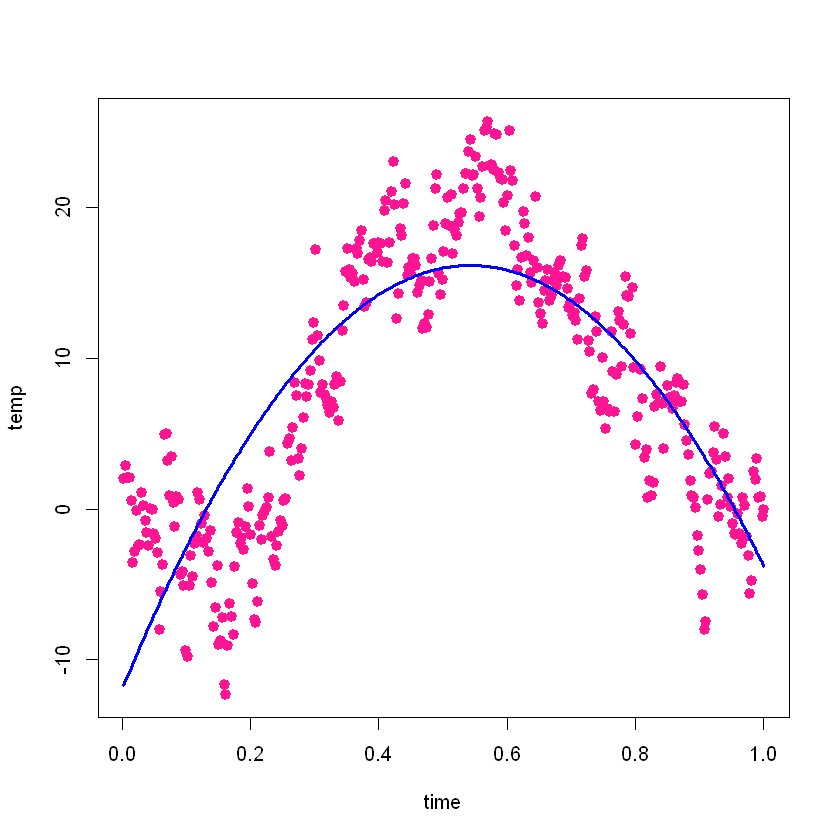

In [10]:
plot(y=temp,x=time,col='deeppink',pch=19,lwd=3)
lines(y=lmTemp$fitted.values,x=time,col='blue',lwd=3)

In [2]:
library(mvtnorm )

we first simulate $\sigma ^2$ from its marginal prior $\text{Inv-}\chi^2$ and then simulate beta from its prior conditional distribution $\mathcal{N}(\mu_0\,\sigma^{2}\Omega_0^{-1 })\$                                                                                                    

In [12]:

sigma2.prior <- function(){
    rinvchisq(draws = 1,n = nu.0,tau = sigma2.0)
}

In [13]:
Beta.prior <- function(sigma2){
    rmvnorm(mean =mu.0,n=1,sigma = sigma2*solve(omega.0))
}

In [14]:
# create empty structure for sigma,Beta and error
NDraws = 200
ErrorTerm = numeric(NDraws)
sigma2 = numeric(NDraws)
BetaList = matrix(,NDraws,3)
colnames(BetaList) = c('B0','B1','B2')


In [15]:
for(i in 1:NDraws){
    sigma2[i] = sigma2.prior()
    BetaList[i,1] = Beta.prior(sigma2[i])[1]
    BetaList[i,2] = Beta.prior(sigma2[i])[2]
    BetaList[i,3] = Beta.prior(sigma2[i])[3]
    ErrorTerm[i] = rnorm(1,mean = 0,sd = sqrt(sigma2))
}

In [16]:
Bayes.Regressor = matrix(,length(time),NDraws)

In [17]:
for(i in 1:NDraws){
    Bayes.Regressor[,i]= BetaList[i,1] +BetaList[i,2]*time + BetaList[i,3]*(time^2) + ErrorTerm[i]
}
colnames(Bayes.Regressor)=paste0('model',1:NDraws)

In [18]:
head(data.frame(Bayes.Regressor),1)

,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,...,model191,model192,model193,model194,model195,model196,model197,model198,model199,model200
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.161435,11.67463,4.815817,9.181286,-11.46555,-25.98747,-16.85168,-21.268,-5.715172,-12.43631,...,0.7156928,-16.54872,-6.356829,-6.133366,-7.804208,-27.39652,-2.466704,-22.98806,-12.89971,-1.305755


In [19]:
TempLink1=data.frame(TempLink)
models=data.frame(TempLink1,Bayes.Regressor)

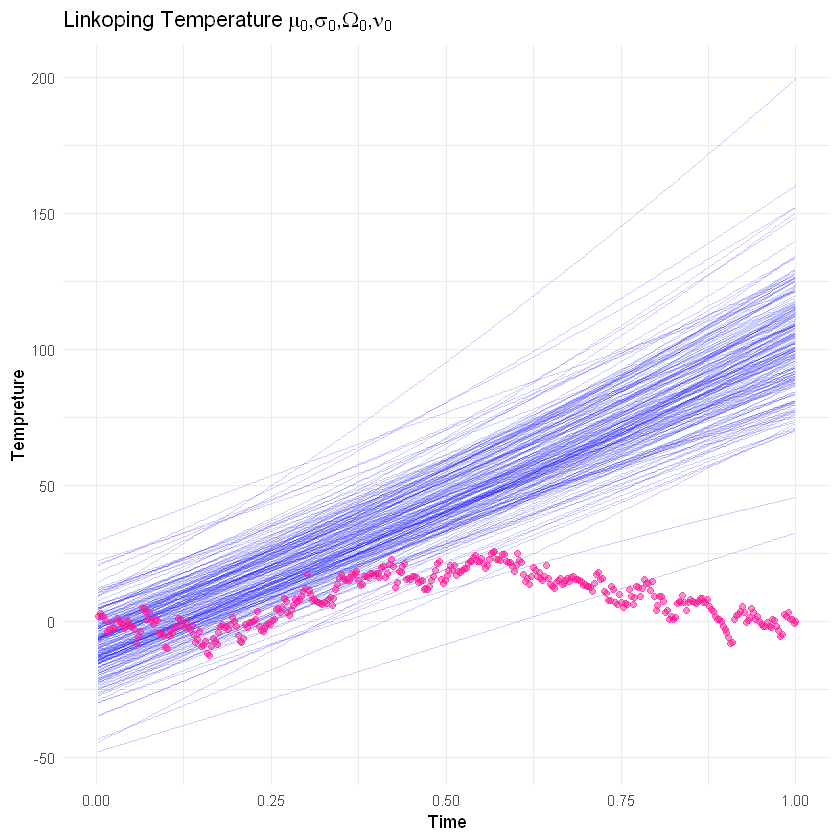

In [47]:
# PLOT for start value of parameters
library(ggplot2)
plot_start_param= ggplot(models , aes(y=temp,x = time)) +
  labs(title =expression(paste("Linkoping Temperature"," " ,mu[0],',',sigma[0],",",
                               Omega[0],',',nu[0])),x = "Time", y="Tempreture") + theme_minimal()

for(i in names(models)[-c(1,2)]){
  plot_start_param = plot_start_param +
    geom_line(aes_string(y = i), color="blue", alpha=0.2)
}

plot_start_param = plot_start_param +
  geom_point(aes(y = temp), alpha=0.5,color='deeppink')
plot_start_param

In [48]:
lmTemp$coefficients

(Intercept)        time   I(time^2) 
  -11.95565   103.58405   -95.41852

### adjusting $\mu_0, \Omega_0, \nu_0, \sigma_0$

The sarting value results to very high value for temptature(ie. $150^\text{o} C $). This is unreasable for swedish weather, To achieve better prior we adjuster the model parameter as fowllowing:

we decided to set the initial value of $\mu_0$ to the `lmTemp$coefficients` we calculated earliear. 

$\mu_0 = (-12,103,-95)$.

From the above plot we see lots of variation in the models so we decided to reduce the value of $\sigma_0$ to $0.03$. This decision was made by trial and error.

we also increased the value of $\nu_0$ to $10$. 

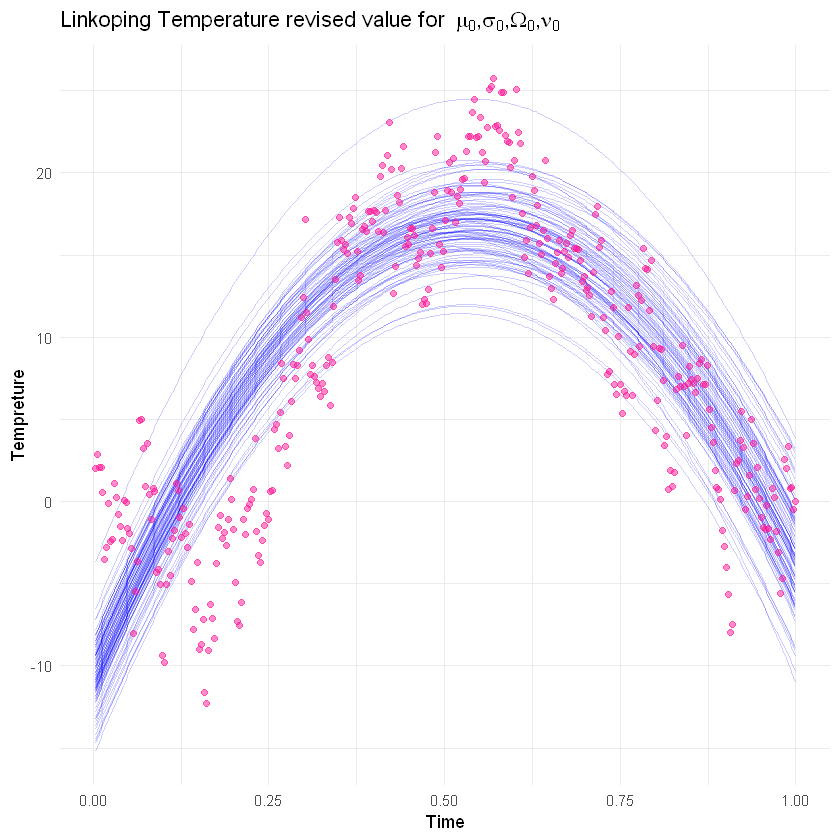

In [22]:
mu.0 = c(-11, 103,-95)
omega.0 = 0.01*diag(3)
nu.0 = 10
sigma2.0 =  0.03
NDraws=100
Bayes.Regressor2 = matrix(,length(time),NDraws)
ErrorTerm2 = numeric(NDraws)
sigma22 = numeric(NDraws)
BetaList2 = matrix(,NDraws,3)
colnames(BetaList2) = c('B0','B1','B2')
for(i in 1:NDraws){
    sigma22[i] = sigma2.prior()
    BetaList2[i,1] = Beta.prior(sigma22[i])[1]
    BetaList2[i,2] = Beta.prior(sigma22[i])[2]
    BetaList2[i,3] = Beta.prior(sigma22[i])[3]
    ErrorTerm[i] = rnorm(1,mean = 0,sd = sqrt(sigma22))
}
for(i in 1:NDraws){
    Bayes.Regressor2[,i]= BetaList2[i,1] +BetaList2[i,2]*time +
    BetaList2[i,3]*(time^2) + ErrorTerm2[i]
}
TempLink2=data.frame(TempLink)
models2=data.frame(TempLink2,Bayes.Regressor2)
plot_new_param= ggplot(models2 , aes(y=temp,x = time)) +
  labs(title =expression(paste("Linkoping Temperature revised value for "," " 
                               ,mu[0],',',sigma[0],",",
                               Omega[0],',',nu[0])),x = "Time",
       y="Tempreture") + theme_minimal()

for(i in names(models2)[-c(1,2)]){
  plot_new_param = plot_new_param +
    geom_line(aes_string(y = i), color="blue", alpha=0.2)
}

plot_new_param = plot_new_param +
  geom_point(aes(y = temp), alpha=0.5,color='deeppink')
plot_new_param

___________________________________________________________________


## b)  
 

Write a program that simulates from the joint posterior distribution of $\beta_0,\beta_1,\beta_2$ and $\sigma^2$.

- Plot the marginal posteriors for each parameter as a histogram.

- make a scatter plot of the temperature data and overlay a curve for the posterior median of the regression function $f(time) = \beta_0 + \beta_1\cdot \text{time} + \beta_2 \cdot \text{time}^2$, i.e. the median is computed for every value of time. In addition, overlay curves for the 95% equal tail posterior probability intervals of $f(time)$, ie. the 2.5 and 97.5 posterior percentiles is computed for every value of time. Does the posterior probability intervals contain most of the data points?Should they?


### The joint posterior distribution 

from  Slide
\begin{equation*}
  \begin{split}
    \sigma^2 \mid y \sim Inv-\chi^2(\nu_n,\sigma_n^2) \\
    \beta \mid \sigma^2,y \sim \mathcal N(\mu_n,\sigma^2\Omega_n^{-1})
  \end{split}
  \label{eq:pos} \tag{3}
\end{equation*}

 new parameters are: 

\begin{equation*}
  \begin{split}
    \Omega_n =& \; X^TX + \Omega_0 \\
    \mu_n =& \; (X^TX + \Omega_0)^{-1}(X^TX\hat{\beta} + \Omega_0\mu_0) \\
    \nu_n =& \; \nu_0 + n \\
    \sigma_n^2 =& \; \frac{1}{\nu_n}[\nu_0\sigma_0^2 + 
    (y^Ty + \mu_0^T\Omega_0\mu_0 - \mu_n^T\Omega_n\mu_n)]
  \end{split}
\end{equation*}


In [23]:
X=model.matrix(lmTemp)
y = temp
# setting the initial values
mu.0 =  c(-11, 103,-95)
omega.0 = 0.01*diag(3)
nu.0 = 4
sigma2.0 = 1
n = dim(X)[1]
NDraws = 1000

In [24]:
omega.n = t(X) %*% X + omega.0
nu.n = nu.0 + n -3 
betaHat = solve(t(X) %*% X) %*% t(X) %*% y
mu.n = solve(t(X) %*% X + omega.0) %*% (t(X) %*% X %*% betaHat + omega.0 %*% mu.0)
sigma2.n = (nu.0 * sigma2.0 + (t(y) %*% y +
                               t(mu.0) %*% omega.0%*% mu.0 -
                               t(mu.n) %*% omega.n %*% mu.n)) / nu.n

In [25]:
sigma2n.pos = numeric(NDraws)
BetaList2n.pos = matrix(,NDraws,3)
colnames(BetaList2n.pos)=c('B0','B1','B2')
pos.sigma2 <- function(nu.n,sigma2.n){
    rinvchisq(1,n = nu.n,tau = sigma2.n)
    
}
pos.Beta <- function(sigma2_n,mu_n,omega_n){
    rmvnorm(1, mu_n, solve(omega_n)*as.numeric(sigma2_n))
}

for (i in 1:NDraws ){
    sigma2n.pos[i] = pos.sigma2(nu.n,sigma2.n)
    BetaList2n.pos[i,] = pos.Beta(sigma2_n = sigma2.n,mu_n = mu.n,omega_n = omega.n)
}

we now plot the marginal posteriors for each parameter as a histogram. We draws 1000 sample for $\sigma_n$ and then use these samples to draw  $\beta$ from $\eqref{eq:pos}$. The reason to do sampling is because we do not have a closed form for the joint posterior density and we can not obtain marginal density by integration.

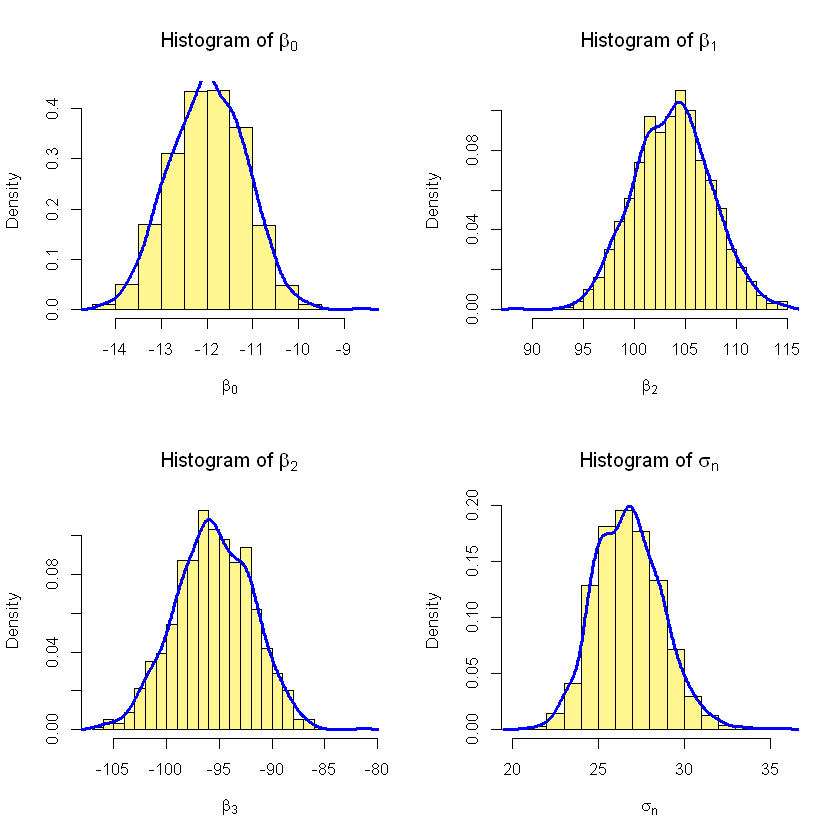

In [26]:
par(mfrow=c(2,2))
p1 =hist(BetaList2n.pos[,1],breaks = 20,probability = TRUE,
         xlab = expression(beta[0]),col='khaki1',
         main=expression(paste('Histogram of'," " ,beta[0])))
lines(density(BetaList2n.pos[,1]),lwd=3,col='blue')
p2 = hist(BetaList2n.pos[,2],breaks = 20,probability = TRUE,
          xlab = expression(beta[2]),col='khaki1',
          main=expression(paste('Histogram of'," " ,beta[1])))
lines(density(BetaList2n.pos[,2]),lwd=3,col='blue')

p3 = hist(BetaList2n.pos[,3],breaks = 20,probability = TRUE,
          xlab = expression(beta[3]),col='khaki1',
          main=expression(paste('Histogram of'," " ,beta[2])))
lines(density(BetaList2n.pos[,3]),lwd=3,col='blue')

p4= hist(sigma2n.pos,probability=TRUE,col='khaki1',
         xlab = expression(sigma[n]),breaks=20,
         main=expression(paste('Histogram of'," " ,sigma[n])))
lines(density(sigma2n.pos),lwd=3,col='blue')

we now calculate the median for every $\beta$.

In [27]:
Beta.median = apply ( BetaList2n.pos , 2, median )

In [28]:
f.time.median = Beta.median %*% t(X)

In [29]:
length(f.time.median)

[1] 365

In [30]:
# Estimation of the whole dataset with 1000 different beta parameters
ypost = BetaList2n.pos %*% t(X)

In [31]:
CI <- matrix(, n, 2)
colnames(CI) <- c("lower","upper")

In [32]:
# calculate the 95% credible interval
for(i in 1:n){
CI[i,] <- quantile( ypost[,i], probs = c(0.025,0.975))
}

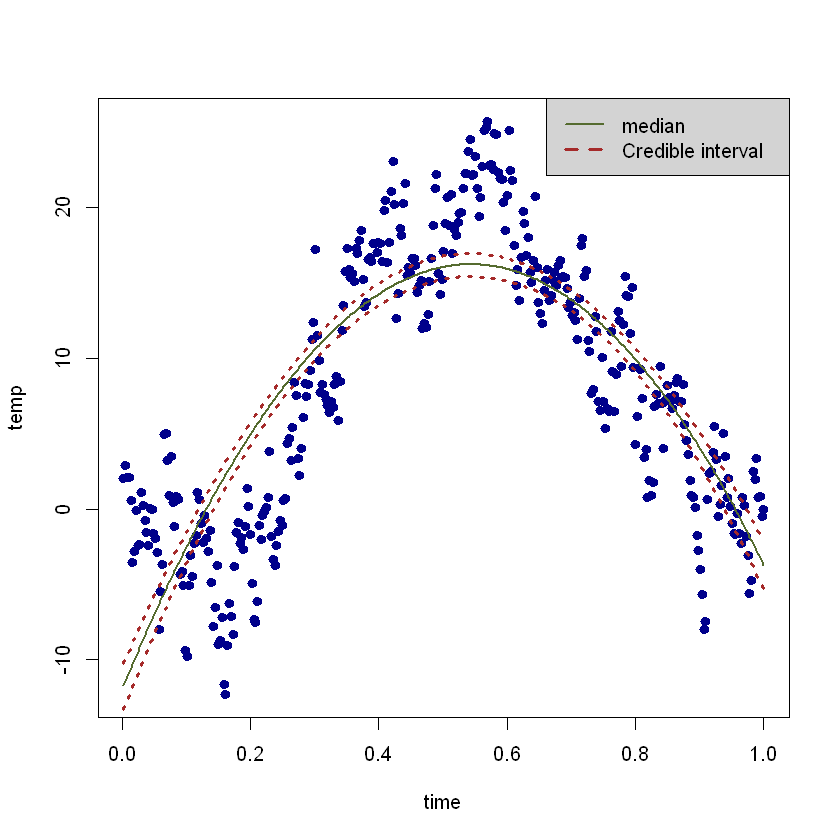

In [33]:
plot(y=temp,x=time,lwd=2,pch=19,col = 'darkblue')
lines ( y = CI[ ,2] ,x= time , col= " brown ",lwd=3,lty = 3)
lines ( y = CI[ ,1] ,x= time , col= " brown ",lwd=3, lty = 3)
lines (y=f.time.median  ,x= time ,col ="darkolivegreen",lwd=2)
legend("topright",c('median','Credible interval'),
       lty=c(1:3),lwd=c(2,3),
       col=c('darkolivegreen','brown'),bg='lightgrey')

The 95 % equal tailed credible interval does not contain most of the data points.
The credible interval is an interval that the regression curve with estimated parameter($\beta$)  falls with 95% of probability. From the plot we see that the median line from the regression model (green line) falls in the Credible interval.a narrow interval credible would indicate the posterior distributions of all beta is narrow, and in this case it means the regression model in better.

____________________________________________________________

## (c)

*It is of interest to locate the **time** with the highest expected temperature (that is, the time where $f(\ time)$ is maximal). Let's call this value $\widetilde{x}$. Use the simulations in b) to simulate from the posterior distribution of $\widetilde{x}$.[Hint: the regression curve is a quadratic. You can find a simple formula for $\widetilde{x}$ given $\beta_0, \beta_1$ and $\beta_2$.]*

In [34]:
dim(ypost)

[1] 1000  365

In [35]:
highest.Temp = numeric(n)
highest.Temp = apply(ypost,2,max)

To find the highest temprature we simply take derivatives of bayesian linear regression:


\begin{equation*}
  \begin{split}
    f(time) = \beta_0 + \beta_1 \cdot time + \beta_2 \cdot time^2 \quad 
   \\ \rightarrow \quad \frac{\partial f(time)}{\partial time} = \beta_1 + 2\beta_2 
    \cdot time = 0 \quad\\ \rightarrow \quad \tilde x = \frac{-\beta_1}{2\beta_2}
  \end{split}
\end{equation*}


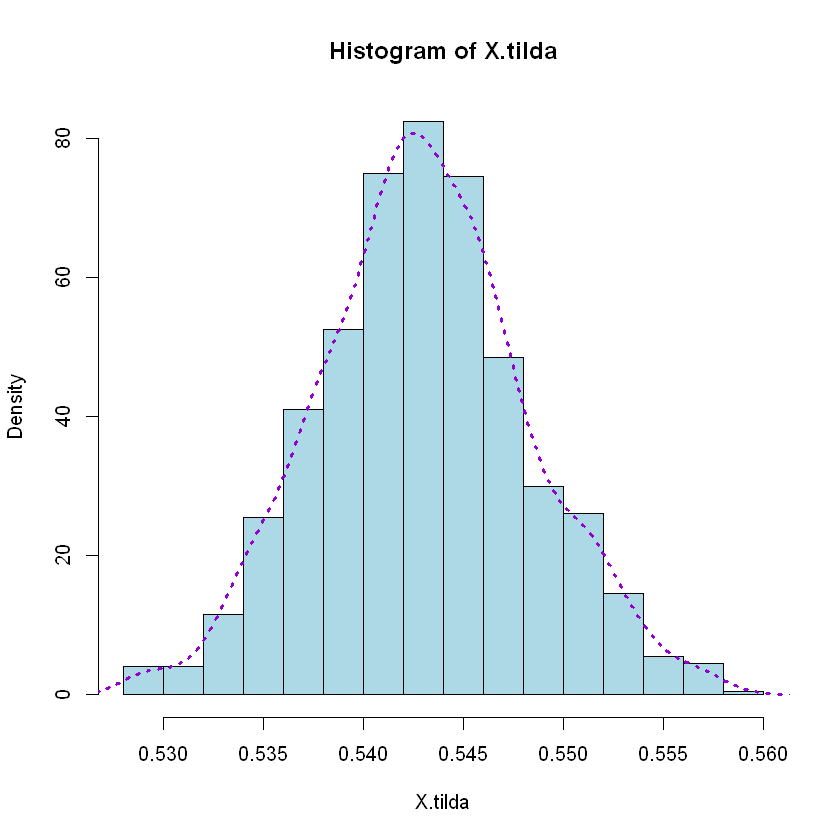

In [36]:
X.tilda <- (-1*BetaList2n.pos[,2])/(2*BetaList2n.pos[,3])
hist(X.tilda,probability = TRUE,breaks = 20,col='lightblue')
lines(density(X.tilda),lwd=3,lty=3,col='darkviolet')

***

## ( d)

*Say now that you want to estimate a **polynomial model of order 7**,
but you suspect that higher order terms may not be needed, and you worry 
about overfitting. Suggest a suitable prior that mitigates this potential problem. 
You do not need to compute the posterior, just write down your prior. 
[Hint: the task is to specify $\mu_0$ and $\Omega_0$ in a suitable way.]*

To avoid overfitting we can use Regularization. Ridge rigression and LASSO could help the potential problem. However, in Ridge Regression the coefficients are not exactly set to zero. If our goal is to set some of the order to 0, LASSO should be our choice.
Using LASSO is equivalent to posterior mode under Laplace prior. where $\mu_0=0$ and
 $\Omega_0$ is diagonal matrix with $\lambda$ values on diagonal, larger $\lambda$  results in more shrinkage = less overfitting
     
\begin{equation*}
  \beta \mid \sigma^2 \sim Laplace\left(0, \frac{\sigma^2}{\lambda}\right)
\end{equation*}

we can determine the value of $\lambda$ by cross-validation. we can also set a prior on $\lambda$

<img src="images\lamda.png" alt="lamda" style="width: 490px;"/>

****


# 2. Posterior approximation for classification with logistic regression

**Description :** The data WomenWork.dat contains 200 observations about the 8 variables about women which are to be used for predicting whether or not the woman work as repsonse variable(Work).

### a.

Below is the logistic regression model which gives us the probability that women works given the input data.

 $$Pr(y = 1 | x) = \frac{exp(x^{T} \beta)}{1 + exp(x^{T} \beta)}$$

The goal is to approximate the posterior distribution of the parameter vector $\beta$ with a multivariate normal distribution.

 $$\beta|y,x \sim N(\tilde\beta,J^{-1}_{y}(\tilde\beta)),$$ 

Here, $\tilde\beta$ is the posterior mode and $J^{-1}_{y}(\tilde\beta)$ is the inverse of negative hessian matrix of posterior mode.


In [37]:
library(mvtnorm)
ww_data <- read.table('WomenWork.dat', header = TRUE)
rows <- nrow(ww_data)
cols <- ncol(ww_data)
y <- as.matrix(ww_data[1])
X <- as.matrix(ww_data[,2:cols])


The optim values of the regression coefficients of the input variables are obtained using optim function

In [38]:
params <- dim(X)[2]
mu <- as.matrix(rep(0,params))
tau = 10
Sigma = (tau^2)*diag(params)

LogPostLogistic <- function(betas,y,X,mu,Sigma){
  linPred <- X%*%betas;
  logLik <- sum(linPred*y - log(1 + exp(linPred)))
  logPrior <- dmvnorm(betas, mu, Sigma, log=TRUE)
  
  return(logLik + logPrior)
}

initValue <- matrix(0,params,1)

# Optimum beta(coefficient) are calculated
OptimRes <- optim(initValue,
                  LogPostLogistic, gr=NULL, y, X, mu, Sigma, method=c("BFGS"),
                  control=list(fnscale=-1), hessian=TRUE)

In [39]:
print('Posterior Mode: ')
print(OptimRes$par)
print('Inverse of hessian matrix')
inversehessian <- solve(OptimRes$hessian)
print(inversehessian)

[1] "Posterior Mode: "
            [,1]
[1,]  0.62672884
[2,] -0.01979113
[3,]  0.18021897
[4,]  0.16756670
[5,] -0.14459669
[6,] -0.08206561
[7,] -1.35913317
[8,] -0.02468351
[1] "Inverse of hessian matrix"
             [,1]          [,2]          [,3]          [,4]          [,5]
[1,] -2.266022546 -3.338861e-03  6.545120e-02  1.179140e-02 -0.0457807242
[2,] -0.003338861 -2.528045e-04  5.610225e-04  3.125413e-05 -0.0001414915
[3,]  0.065451205  5.610225e-04 -6.218199e-03  3.558209e-04 -0.0018962893
[4,]  0.011791404  3.125413e-05  3.558209e-04 -4.351716e-03  0.0142490853
[5,] -0.045780724 -1.414915e-04 -1.896289e-03  1.424909e-02 -0.0555786706
[6,]  0.030293449  3.588562e-05  3.240460e-06  1.340888e-04  0.0003299398
[7,]  0.188748357 -5.066847e-04  6.134564e-03  1.468951e-03 -0.0032082534
[8,]  0.098023927  1.444223e-04 -1.752732e-03 -5.437105e-04 -0.0005120144
              [,6]          [,7]          [,8]
[1,]  3.029345e-02  0.1887483570  0.0980239275
[2,]  3.588562e-05 -0.0005066847

In [40]:
print('Estimtes obtained using GLM model:')
print(glm(Work ~ 0 + ., data = ww_data, family = binomial)$coefficients)

[1] "Estimtes obtained using GLM model:"
   Constant  HusbandInc   EducYears    ExpYears   ExpYears2         Age 
 0.64430363 -0.01977457  0.17988062  0.16751274 -0.14435946 -0.08234033 
NSmallChild   NBigChild 
-1.36250239 -0.02542986 


As observed from coefficients obtained using GLM model and from using bayesian approximation, we can say that the values are mostly similar.


In [41]:
beta_post <- OptimRes$par
names(beta_post) <- colnames(ww_data[,2:cols])
approx_par_NSC <- rnorm(1000,beta_post['NSmallChild'],-inversehessian[7,7])
lowerInterval <- quantile(approx_par_NSC,0.05)
upperInterval <- quantile(approx_par_NSC, 0.95)

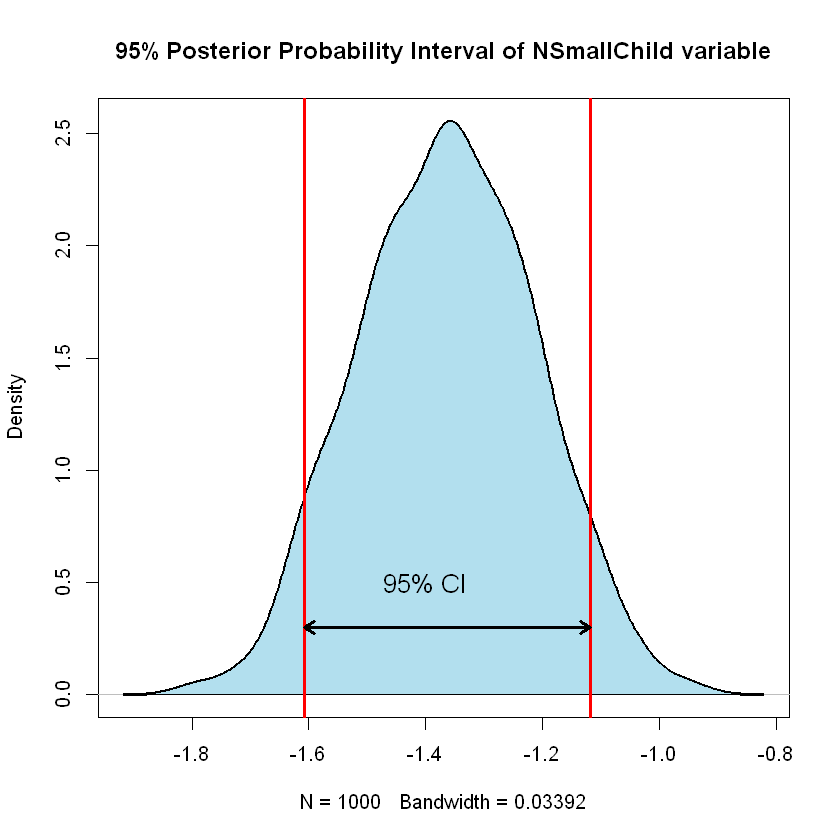

In [42]:
plot(density(approx_par_NSC),lwd = 3,main = '95% Posterior Probability Interval of NSmallChild variable')
polygon(density(approx_par_NSC), col = 'lightblue2')
abline(v = lowerInterval, col = 'red', lwd = 3)
abline(v = upperInterval, col = 'red', lwd = 3)
arrows(lowerInterval,0.3,upperInterval,0.3,length = 0.1,col = 'black',lwd = 3)
arrows(upperInterval,0.3,lowerInterval,0.3,length = 0.1,col = 'black',lwd = 3)
text(-1.4,0.5, '95% CI', lwd = 3,cex = 1.3)

**Would you say that this feature is of importance for the probability that a women works?**

According to the results of the parameters obtained above, the coefficient of NSmallChild is around -1.36 which is the lowest among the remaining coefficients. It can be said that, this variable is negatively impacting to the probability of women works which looks reasonable from general point of view (women taking care of child).

### b. Simulation of draws from Posterior predictive distribution of $Pr(y = 1 | x)$

The given values of the variable for the women are:

HusbandInc: 13, EducYears: 8, ExpYears:11, Age:37, NSmallChild:2, NBigChild:0

In [43]:
posteriorPredictive <- function(x, beta_post, inversehessian){
  post_sample <- rmvnorm(1, beta_post,-inversehessian)
  logist_prob <- (exp(x %*% t(post_sample)))/(1 + exp(x %*% t(post_sample)))
  return(logist_prob)
}

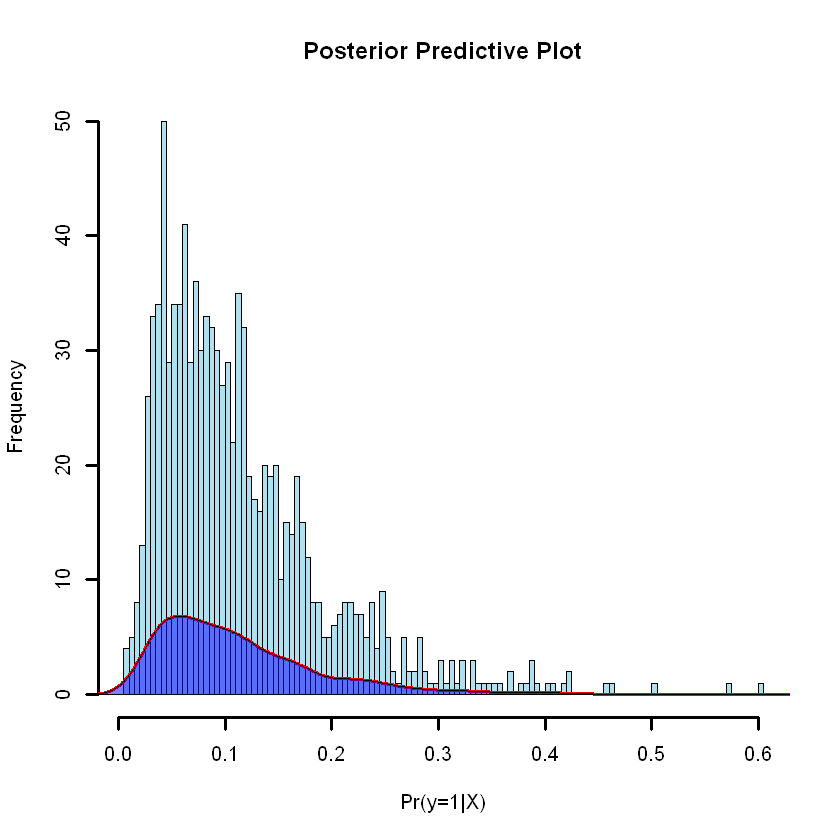

In [44]:
x <- c(1,13, 8, 11, (11/10)^2, 37, 2, 0)
nsamples = 1000
post_predict <- c(rep(0,nsamples))
for(i in 1:nsamples){
  post_predict[i] <- posteriorPredictive(x, beta_post, inversehessian)
}
#print(post_predict)
hist(post_predict, breaks = 100, 
     col = 'lightblue2',lwd = 3,
     xlab = 'Pr(y=1|X)',
     main = 'Posterior Predictive Plot')
lines(density(post_predict), col = 'red',lwd = 3)
polygon(density(post_predict), 
        col = rgb(red = 0, green = 0, blue = 1, alpha = 0.5))

# c. Posterior predictive distribution for the number of women working.

Here, 8 women with similar features as above are considered and the probabilities of how many them work are predicted.


In [45]:
posteriorPredictiveBinomial <- function(x, beta_post, inversehessian){
  post_sample <- rmvnorm(1, beta_post,-inversehessian)
  logist_prob1 <- (exp(x %*% t(post_sample)))/(1 + exp(x %*% t(post_sample)))
  logist_prob <- sum(rbinom(1,8,logist_prob1))
  return(logist_prob)
}

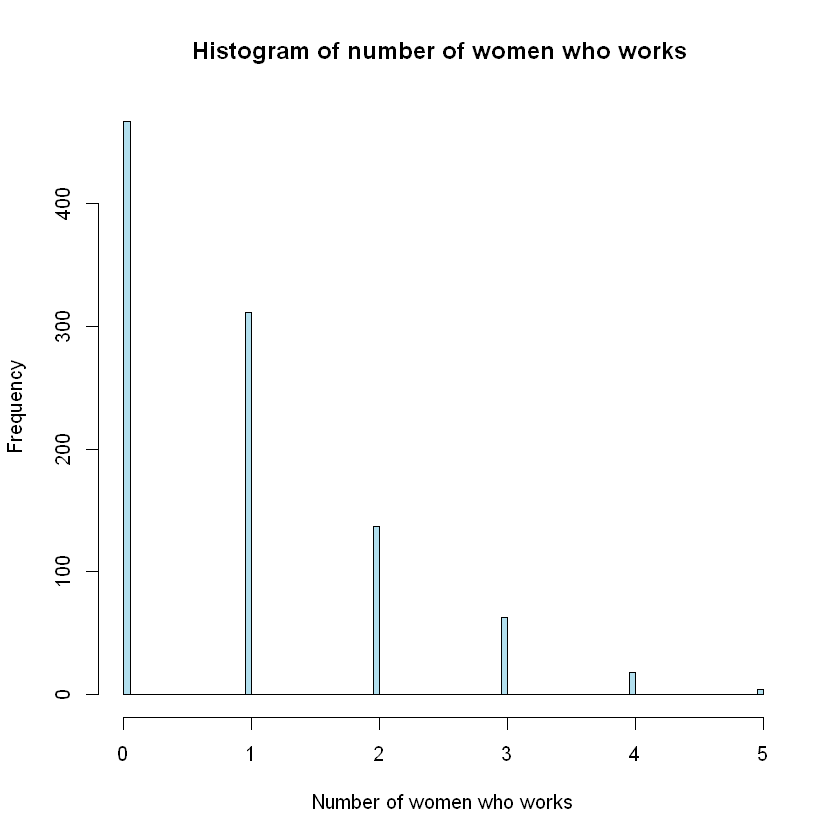

In [46]:
test_data <- matrix(x,nrow=8, ncol=8,byrow = TRUE)
nsamples = 1000
post_predict <- c(rep(0,nsamples))
for(i in 1:nsamples){
  post_predict[i] <- posteriorPredictiveBinomial(test_data, beta_post,
                                                 inversehessian)
}
hist(post_predict,breaks = 100,col = 'lightblue2',
     xlab = 'Number of women who works',
     main = 'Histogram of number of women who works ')